In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df.drop(['Email No.', 'Prediction'],axis =1)
Y = df['Prediction']

In [ ]:
X.shape

(5172, 3000)

In [ ]:
X.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

<Axes: xlabel='Prediction', ylabel='count'>

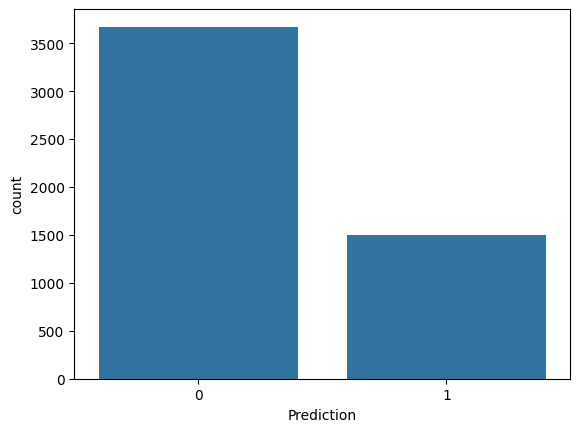

In [ ]:
import seaborn as sns
sns.countplot(x = Y)

In [ ]:
Y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(X)

In [ ]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[917 200]
 [ 26 409]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1117
           1       0.67      0.94      0.78       435

    accuracy                           0.85      1552
   macro avg       0.82      0.88      0.84      1552
weighted avg       0.89      0.85      0.86      1552

0.854381443298969


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9639175257731959
